In [1]:
#Carga del repo de Github

!git clone https://github.com/Sansote/TT1-Trabajo_Final_2025.git

Cloning into 'TT1-Trabajo_Final_2025'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 3.64 MiB | 10.90 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carga del archivo de trabajo
ruta = 'TT1-Trabajo_Final_2025/metricas_GARCH.xlsx'
df = pd.read_excel(ruta)
df.head()

,Accion,MAE,MSE,MAE sin Outliers,MSE sin Outliers
0,ALUA,0.143462,0.021043,0.136033,0.018593
1,BBAR,0.161811,0.026855,0.149149,0.022263
2,BMA,0.161919,0.026590,0.148272,0.022013
3,BYMA,0.145369,0.021744,0.128381,0.016555
4,CEPU,0.158071,0.025630,0.144315,0.020850


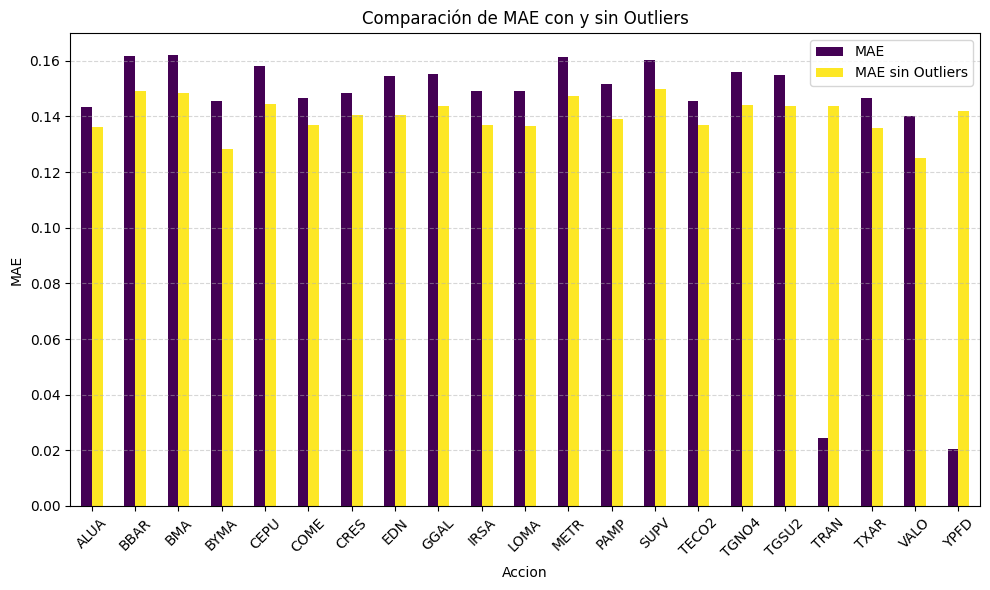

In [4]:

#Comparacion de MAE en G-ARCH con y sin Outliers
if 'Accion' in df.columns:
    df.set_index('Accion', inplace=True)


df[['MAE', 'MAE sin Outliers']].plot(
    kind='bar',
    figsize=(10, 6),
    ylabel='MAE',
    title='Comparación de MAE con y sin Outliers',
    colormap='viridis'
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

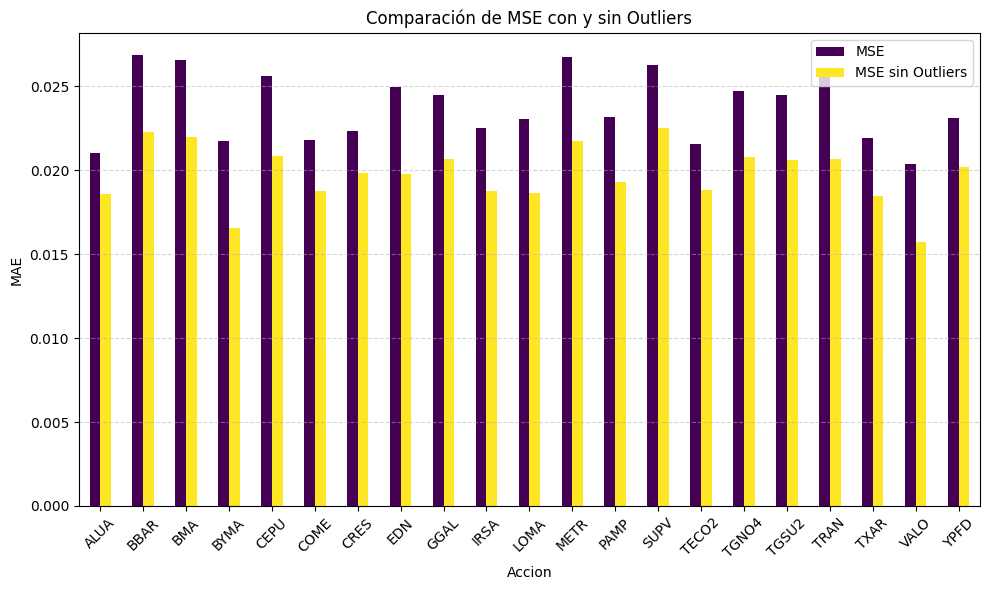

In [19]:
#Comparacion de MSE en G-ARCH con y sin Outliers
if 'Accion' in df.columns:
    df.set_index('Accion', inplace=True)


df[['MSE', 'MSE sin Outliers']].plot(
    kind='bar',
    figsize=(10, 6),
    ylabel='MAE',
    title='Comparación de MSE con y sin Outliers',
    colormap='viridis'
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

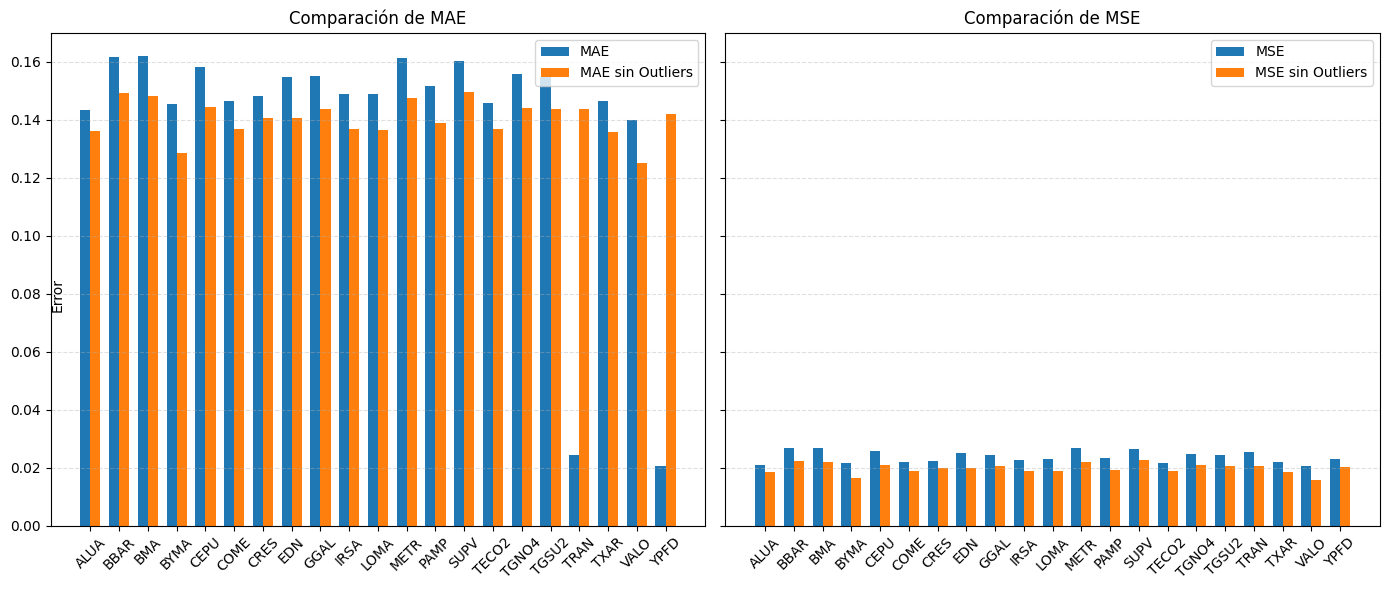

In [6]:

# Suponiendo que 'df' tiene como índice los nombres de las acciones
acciones = df.index.tolist()

# Datos de los dos gráficos
mae = df['MAE'].values
mae_sin_out = df['MAE sin Outliers'].values
mse = df['MSE'].values
mse_sin_out = df['MSE sin Outliers'].values

x = np.arange(len(acciones))
width = 0.35

# Crear dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Primer gráfico: MAE
axes[0].bar(x - width/2, mae, width, label='MAE')
axes[0].bar(x + width/2, mae_sin_out, width, label='MAE sin Outliers')
axes[0].set_title('Comparación de MAE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(acciones, rotation=45)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.4)

# Segundo gráfico: MSE
axes[1].bar(x - width/2, mse, width, label='MSE')
axes[1].bar(x + width/2, mse_sin_out, width, label='MSE sin Outliers')
axes[1].set_title('Comparación de MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(acciones, rotation=45)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

# Etiqueta común del eje Y
fig.text(0.04, 0.5, 'Error', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [7]:
#importo el set de metricas del LSTM
ruta_2 = 'TT1-Trabajo_Final_2025/metricas_LSTM.xlsx'
df_LSTM = pd.read_excel(ruta_2)
df_LSTM.head()

,Accion,MAE,MSE
0,ALUA,0.00107,0.00002
1,BBAR,0.00659,0.00024
2,BMA,0.00477,0.00022
3,BYMA,0.00146,0.00015
4,CEPU,0.00189,0.00022


In [11]:
#renombro para joinear con el otro df
df_LSTM.rename(columns={
    'MAE': 'MAE_LSTM',
    'MSE': 'MSE_LSTM'
}, inplace=True)
df_LSTM.head()

,Accion,MAE_LSTM,MSE_LSTM
0,ALUA,0.00107,0.00002
1,BBAR,0.00659,0.00024
2,BMA,0.00477,0.00022
3,BYMA,0.00146,0.00015
4,CEPU,0.00189,0.00022


In [12]:
#joineo ambos dataframes
df_joineado = pd.merge(df, df_LSTM, on='Accion', how='inner')
df_joineado

,Accion,MAE,MSE,MAE sin Outliers,MSE sin Outliers,MAE_LSTM,MSE_LSTM
0,ALUA,0.143462,0.021043,0.136033,0.018593,0.00107,0.00002
1,BBAR,0.161811,0.026855,0.149149,0.022263,0.00659,0.00024
2,BMA,0.161919,0.026590,0.148272,0.022013,0.00477,0.00022
3,BYMA,0.145369,0.021744,0.128381,0.016555,0.00146,0.00015
4,CEPU,0.158071,0.025630,0.144315,0.020850,0.00189,0.00022
5,COME,0.146483,0.021832,0.136900,0.018787,0.00118,0.00003
6,CRES,0.148327,0.022338,0.140617,0.019849,0.00122,0.00003
7,EDN,0.154668,0.024979,0.140577,0.019805,0.00219,0.00026
8,GGAL,0.155169,0.024497,0.143759,0.020689,0.00321,0.00022
9,IRSA,0.148984,0.022503,0.136934,0.018769,0.00147,0.00003


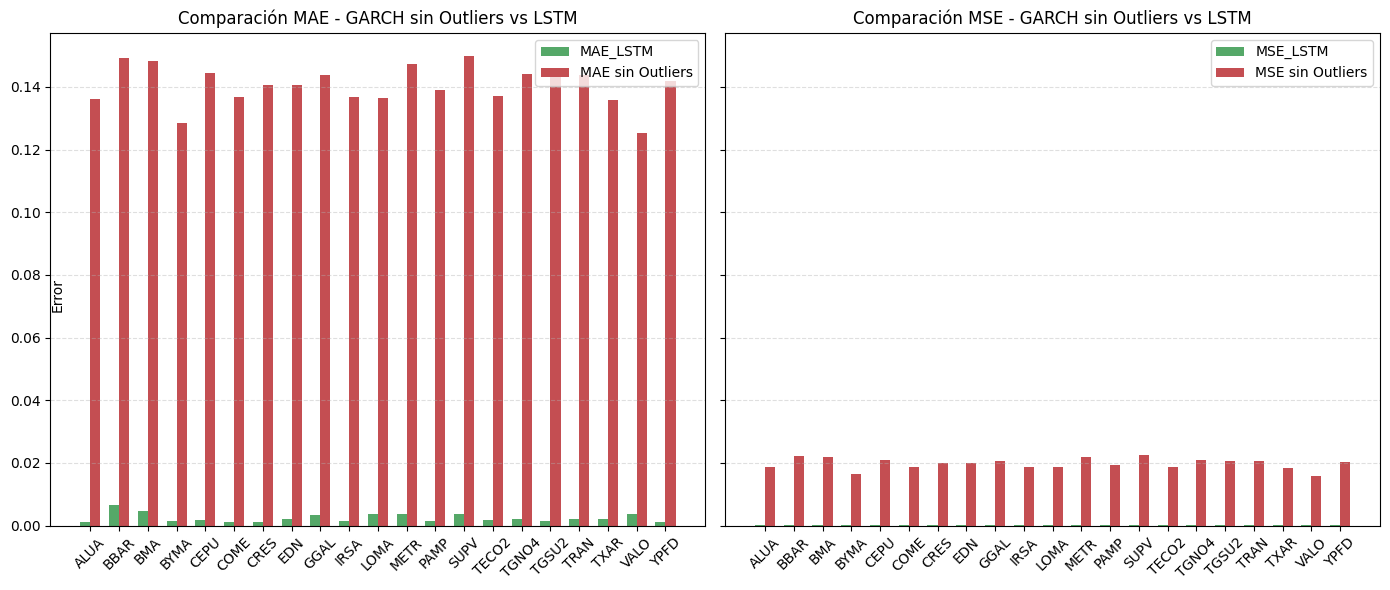

In [18]:
#armo grafico de comparacion de metrica entre G-ARCH y LSTM

acciones = df.index.tolist()


mae_LSTM = df_joineado['MAE_LSTM'].values
mae_sin_out = df_joineado['MAE sin Outliers'].values
mse_LSTM = df_joineado['MSE_LSTM'].values
mse_sin_out = df_joineado['MSE sin Outliers'].values

x = np.arange(len(acciones))
width = 0.35


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


axes[0].bar(x - width/2, mae_LSTM, width, label='MAE_LSTM',color='#55A868')
axes[0].bar(x + width/2, mae_sin_out, width, label='MAE sin Outliers', color='#C44E52')
axes[0].set_title('Comparación MAE - GARCH sin Outliers vs LSTM')
axes[0].set_xticks(x)
axes[0].set_xticklabels(acciones, rotation=45)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.4)


axes[1].bar(x - width/2, mse_LSTM, width, label='MSE_LSTM',color='#55A868')
axes[1].bar(x + width/2, mse_sin_out, width, label='MSE sin Outliers', color='#C44E52')
axes[1].set_title('Comparación MSE - GARCH sin Outliers vs LSTM')
axes[1].set_xticks(x)
axes[1].set_xticklabels(acciones, rotation=45)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.4)


fig.text(0.04, 0.5, 'Error', va='center', rotation='vertical')


plt.tight_layout()
plt.show()